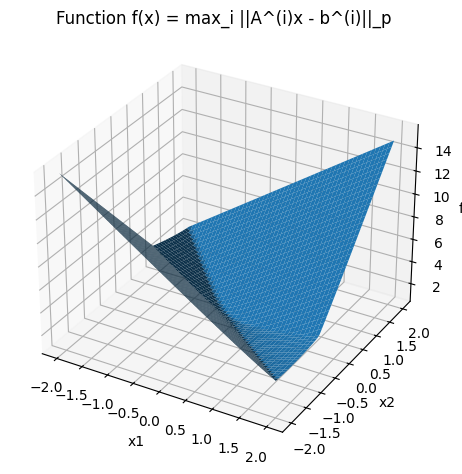

In [ ]:
import numpy as np

# For part (a), simulate function values over a grid to examine the shape (for convexity intuition)
def f_a(x, A_list, b_list, p):
    return max([np.linalg.norm(A @ x - b, ord=p) for A, b in zip(A_list, b_list)])

# Define two A^(i) and b^(i) matrices
A1 = np.array([[1, 2], [3, 4]])
A2 = np.array([[2, 1], [0, 1]])
b1 = np.array([1, 0])
b2 = np.array([0, 1])
A_list = [A1, A2]
b_list = [b1, b2]
p = 2

# Evaluate function over a grid of x values
x1_vals = np.linspace(-2, 2, 50)
x2_vals = np.linspace(-2, 2, 50)
Z_a = np.zeros((len(x1_vals), len(x2_vals)))

for i, x1 in enumerate(x1_vals):
    for j, x2 in enumerate(x2_vals):
        x = np.array([x1, x2])
        Z_a[i, j] = f_a(x, A_list, b_list, p)

import matplotlib.pyplot as plt

# Part (a): plot the function over grid to visualize
X1, X2 = np.meshgrid(x1_vals, x2_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z_a.T)
ax.set_title("Function f(x) = max_i ||A^(i)x - b^(i)||_p")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x)")
plt.tight_layout()
plt.show()


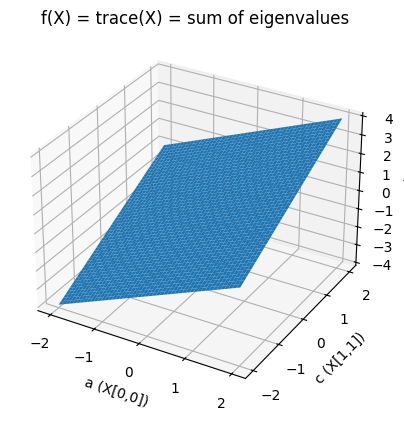

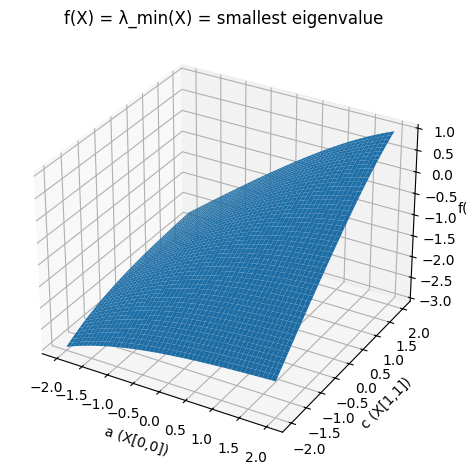

In [ ]:
# Simulate parts (b) and (c) numerically over a grid of symmetric 2x2 matrices
# Symmetric 2x2 matrix: [[a, b], [b, c]] — 3 degrees of freedom: a, b, c

a_vals = np.linspace(-2, 2, 50)
c_vals = np.linspace(-2, 2, 50)
Z_b = np.zeros((len(a_vals), len(c_vals)))
Z_c = np.zeros((len(a_vals), len(c_vals)))

for i, a in enumerate(a_vals):
    for j, c in enumerate(c_vals):
        b = 1.0  # fix off-diagonal value to visualize variation in a and c
        X = np.array([[a, b], [b, c]])
        eigenvalues = np.linalg.eigvalsh(X)  # symmetric matrix eigenvalues
        Z_b[i, j] = np.sum(eigenvalues)  # Part (b): sum = trace
        Z_c[i, j] = np.min(eigenvalues)  # Part (c): smallest eigenvalue

# Plot part (b)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

A_vals, C_vals = np.meshgrid(a_vals, c_vals)

fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(A_vals, C_vals, Z_b.T)
ax1.set_title("f(X) = trace(X) = sum of eigenvalues")
ax1.set_xlabel("a (X[0,0])")
ax1.set_ylabel("c (X[1,1])")
ax1.set_zlabel("f(X)")

# Plot part (c)
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')
ax2.plot_surface(A_vals, C_vals, Z_c.T)
ax2.set_title("f(X) = λ_min(X) = smallest eigenvalue")
ax2.set_xlabel("a (X[0,0])")
ax2.set_ylabel("c (X[1,1])")
ax2.set_zlabel("f(X)")

plt.tight_layout()
plt.show()
